In [1]:
import mplfinance as mpf
import pandas as pd

In [2]:
#* Get data from Stooq
data = pd.read_csv("https://stooq.com/q/d/l/?s=btc.v&d1=20190101&d2=20221231&i=d",index_col=0,parse_dates=True)

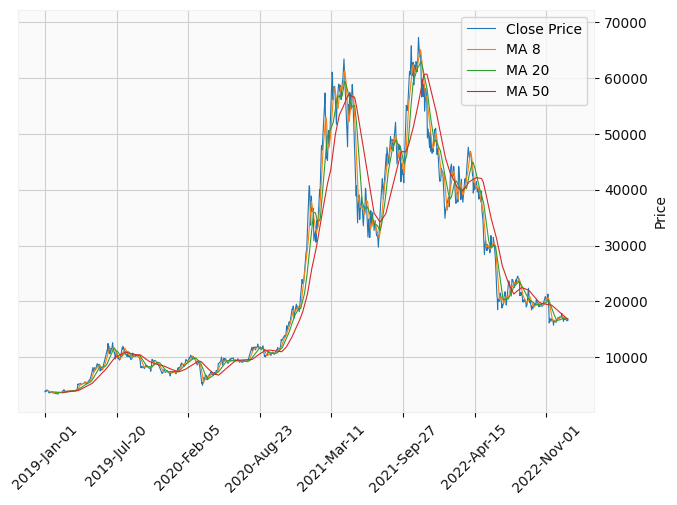

In [3]:
_, axes = mpf.plot(
    data, type="line", style="yahoo", mav=(8, 20, 50), returnfig=True
)

axes[0].legend([None] * 5)
handles = axes[0].get_legend().legendHandles
axes[0].legend(handles=handles, labels=list(["Close Price", "MA 8", "MA 20", "MA 50"]))